In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
sys.path.append("../../")
import data_loading as dl

from microfit import run_plotter as rp
from microfit import histogram as hist

In [3]:
RUN = ["1"]  # this can be a list of several runs, i.e. [1,2,3]
rundata, mc_weights, data_pot = dl.load_runs(
    RUN,
    data="bnb",  # which data to load
    # truth_filtered_sets=["nue", "drt", "nc_pi0", "cc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"],
    # Which truth-filtered MC sets to load in addition to the main MC set. At least nu_e and dirt
    # are highly recommended because the statistics at the final level of the selection are very low.
    truth_filtered_sets=["nue", "drt"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=False,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    # Since this is Open Data, we are allowed to unblind the data. By default, the data is blinded.
    blinded=False,
)

In [4]:
selection = "NPL"
preselection = "NP"
# binning_def = ("reco_e", 17, (0.01, 2.39), r"Reconstructed Energy [ GeV ]")
binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")  # reproduce technote
binning = hist.Binning.from_config(*binning_def)
signal_generator = hist.RunHistGenerator(
    rundata,
    binning,
    data_pot=data_pot,
    selection=selection,
    preselection=preselection,
    sideband_generator=None,
    uncertainty_defaults=None,
)
plotter = rp.RunHistPlotter(signal_generator)
# plotter.title = plotter.get_selection_title(selection=selection, preselection=preselection)

<AxesSubplot:title={'center':'1eNp Presel. and 1eNp Loose cuts'}, xlabel='Reconstructed Energy [GeV]', ylabel='Events'>

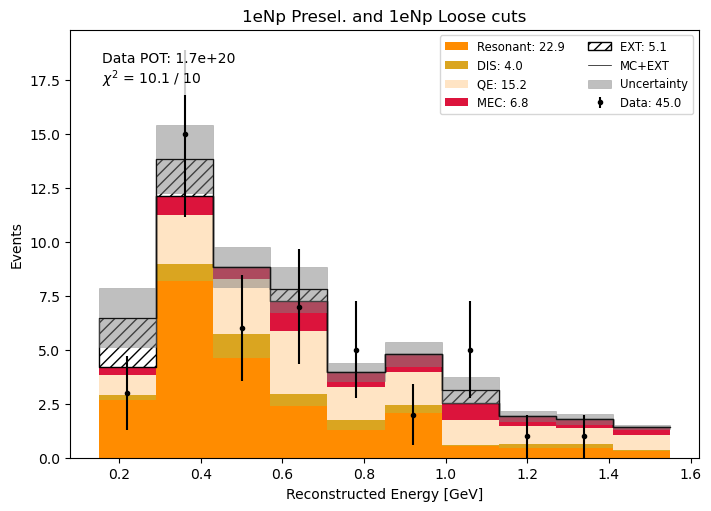

In [5]:
from matplotlib import pyplot as plt
pot_scale = 1e21
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
plotter.plot(add_ext_error_floor=False, category_column="interaction", ax=ax, show_chi_square=True, include_multisim_errors=False)
# save figure
# fig.savefig(f"Run1_{preselection}_{selection}_{pot_scale:.2e}.pdf")
